Steps Involved In the Prediction App

Define the Problem: Machine learning App that Predicts if one is suffering from a certain kind of disease(diabetes and heart disease ). The dataset is derived from kaggle from certain group of countries but work the prediction work fine with any other country.Dataset has 14 columns and 303 rows

Gather the Data: The data is derived from kaggle. here is link((https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download))

Data Preprocessing: This is where we wrangle( turn messy data into neat data) data and search for data but thanks to kaggle this wrangling is really not done. We also make sense out of the data here. Computers does not understand text and most especially most machine learning models wont work well with text data so something like sex has to be converted to 0/1(female and male)

Exploratory Data Analysis:deploy descriptive and graphical statistics to look for potential problems, patterns, classifications, correlations and comparisons in the dataset

Model Data: we model data so we can either summarize the data or predict future outcomes

Evaluation: you make predictions and ensure it is closer to or 100%

1.Define the problem
age
sex
cp-chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl( Milligrams per decilitre)
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
target

In [1]:
#*2. Gather the Data *
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("desktop/data/heart.csv")

In [3]:
#*3.Data Preprocessing *


In [4]:
#5 random sample of dataset
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1


In [5]:
#number of rows and columns
df.shape

(303, 14)

In [6]:
# summary of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#data statistics.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
##checking for null values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#**4. Exploratory  Data Analysis(EDA) **

In [10]:
#target who have cardio disease and those that dont have
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

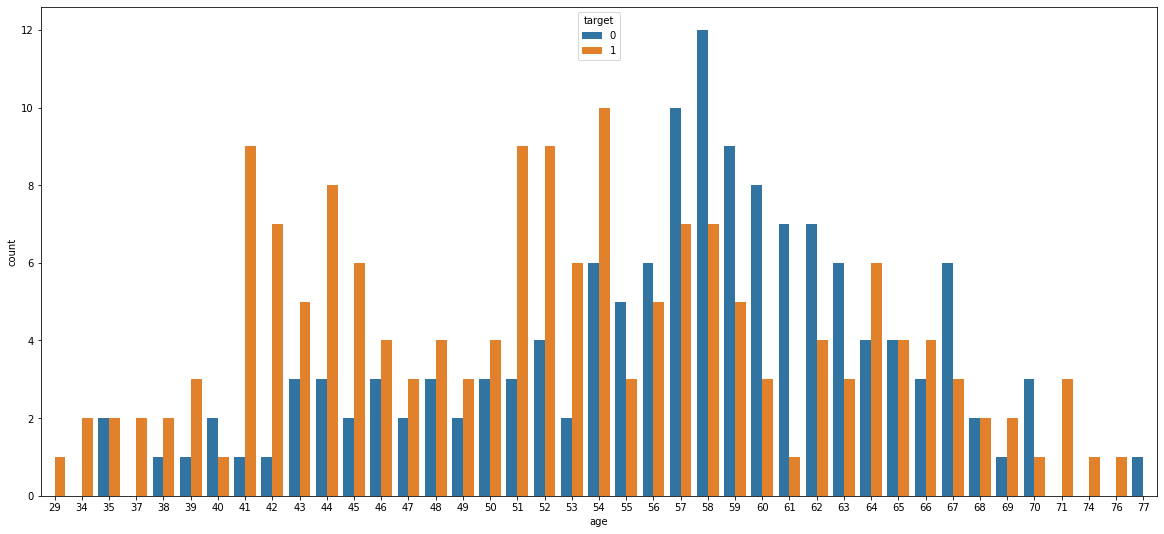

In [11]:
#plotting males and females agegroup who either have cardivascular disease or not
plt.figure(figsize=(20,9))
sns.countplot(x='age', hue='target', data=df)

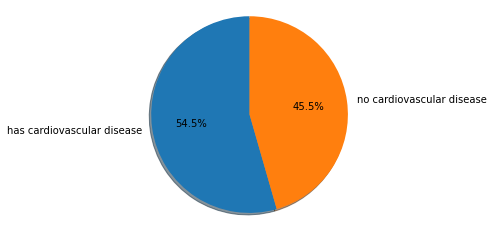

In [12]:
#visualizing in Pie chart
labels = "has cardiovascular disease", "no cardiovascular disease"
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(df.target.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [13]:
#5. Model Data using different kind of models so we can chose the one that gives highest percentage of predictionn All our models which are used here are to predict binary outcome that is 0/1

In [14]:
# separatinng rest of dataset(independent data) from target/outcome(dependent)
x = df.iloc[:, 0:-1] #independent variables
y = df.iloc[:, -1] #dependent variable(target)

In [15]:
# spltting the dataset into train(80%) and test set(20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 31)

In [16]:
len(x_train), len(x_test), len(y_train), len(y_test)

(242, 61, 242, 61)

In [17]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter = 1000, random_state = 4) 
log_clf.fit(x_train, y_train)#training the dataset
log_score = log_clf.score(x_test, y_test)
log_score

0.8360655737704918

In [18]:
#Tuning Logistic Regression to enhance prediction
from sklearn.model_selection import GridSearchCV
log_grid = {'C': np.logspace(-5, 5),
            'solver': ['liblinear'],
            'max_iter': np.arange(1000, 2000, 100),
            'penalty':['l1', 'l2']
           }

log_gscv = GridSearchCV(LogisticRegression(random_state = 7),
                          param_grid=log_grid,
                          cv=5,
                          verbose=True)

log_gscv.fit(x_train, y_train)
log_tuned_score = log_gscv.score(x_test, y_test)
log_tuned_score


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


0.8852459016393442

In [19]:
#best parameter in logistic regression which we tuned
log_gscv.best_params_

{'C': 0.1206792640639329,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [20]:
from sklearn import svm
svc_clf = svm.SVC(random_state = 7)
svc_clf.fit(x_train, y_train)
svc_score = svc_clf.score(x_test, y_test)
svc_score

0.5737704918032787

In [21]:
svc_grid = {'C': np.logspace(-5, 5, 20),
            'kernel': ['rbf'],
            'degree': [2,3,4]
           }

svc_gscv = GridSearchCV(svm.SVC(random_state = 31),
                        param_grid=svc_grid,
                        cv=5,
                        verbose=True)

svc_gscv.fit(x_train, y_train)
svc_tuned_score = log_gscv.score(x_test, y_test)
svc_tuned_score

Fitting 5 folds for each of 60 candidates, totalling 300 fits


0.8852459016393442

In [22]:
svc_gscv.best_params_

{'C': 2636.6508987303555, 'degree': 2, 'kernel': 'rbf'}

In [27]:
#lets see scores of our various models
# create a dictionary with all scores
score = [{'Model':'Logistic Regression', 'Score': log_score, 'Tuned_score': log_tuned_score},
         #{'Model':'Gradient Boosting', 'Score': gbc_score, 'Tuned_score': gbc_tuned_score},
         {'Model':'SVC', 'Score': svc_score, 'Tuned_score': svc_tuned_score}
        ]

In [28]:
pd.DataFrame(score, columns=['Model','Score','Tuned_score'])

,Model,Score,Tuned_score
0,Logistic Regression,0.836066,0.885246
1,SVC,0.573770,0.885246
